In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


In [17]:
train_transaction = pd.read_csv("/kaggle/input/ieee-fraud-detection/train_transaction.csv")
train_identity = pd.read_csv("/kaggle/input/ieee-fraud-detection/train_identity.csv")
test_transaction = pd.read_csv("/kaggle/input/ieee-fraud-detection/test_transaction.csv")
test_identity = pd.read_csv("/kaggle/input/ieee-fraud-detection/test_identity.csv")

In [18]:
print(train_transaction.shape)
print(train_identity.shape)

(590540, 394)
(144233, 41)


In [19]:
print(train_transaction.head())

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN  

In [20]:
print(train_transaction.describe())

       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000    

In [21]:
print(train_identity.describe())

       TransactionID          id_01          id_02         id_03  \
count   1.442330e+05  144233.000000  140872.000000  66324.000000   
mean    3.236329e+06     -10.170502  174716.584708      0.060189   
std     1.788496e+05      14.347949  159651.816856      0.598231   
min     2.987004e+06    -100.000000       1.000000    -13.000000   
25%     3.077142e+06     -10.000000   67992.000000      0.000000   
50%     3.198818e+06      -5.000000  125800.500000      0.000000   
75%     3.392923e+06      -5.000000  228749.000000      0.000000   
max     3.577534e+06       0.000000  999595.000000     10.000000   

              id_04          id_05          id_06        id_07        id_08  \
count  66324.000000  136865.000000  136865.000000  5155.000000  5155.000000   
mean      -0.058938       1.615585      -6.698710    13.285354   -38.600388   
std        0.701015       5.249856      16.491104    11.384207    26.084899   
min      -28.000000     -72.000000    -100.000000   -46.000000  -100.00

In [22]:
print(train_transaction.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB
None


In [23]:
print(train_identity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [24]:
import gc

train = pd.merge(train_transaction, train_identity, on = "TransactionID")
train = train_transaction
print(train.info())
print(len(train[train['isFraud'] == 1]))
del train_transaction
del train_identity
gc.collect()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB
None
20663


40

In [25]:
train.fillna(-99999, inplace = True)
train['ProductCD'] = train['ProductCD'].astype('category').cat.codes
train['addr1'] = train['addr1'].astype('category').cat.codes
train['addr2'] = train['addr2'].astype('category').cat.codes
train['P_emaildomain'] = train['P_emaildomain'].astype('category').cat.codes
train['R_emaildomain'] = train['R_emaildomain'].astype('category').cat.codes
for i in range(1, 7):
    train['card'+str(i)] = train['card'+str(i)].astype('category').cat.codes
for i in range(1, 10):
    train['M'+str(i)] = train['M'+str(i)].astype('category').cat.codes
print(train)

        TransactionID  isFraud  TransactionDT  TransactionAmt  ProductCD  \
0             2987000        0          86400           68.50          4   
1             2987001        0          86401           29.00          4   
2             2987002        0          86469           59.00          4   
3             2987003        0          86499           50.00          4   
4             2987004        0          86506           50.00          1   
...               ...      ...            ...             ...        ...   
590535        3577535        0       15811047           49.00          4   
590536        3577536        0       15811049           39.50          4   
590537        3577537        0       15811079           30.95          4   
590538        3577538        0       15811088          117.00          4   
590539        3577539        0       15811131          279.95          4   

        card1  card2  card3  card4  card5  ...     V330     V331     V332  \
0       10

In [26]:
#Under-Sampling

Fraud = train[train['isFraud'] == 1]
NonFraud = train[train['isFraud'] == 0].sample(n = 10*len(Fraud), axis = 0)
train = Fraud.append(NonFraud).sample(frac = 1)

X, y = train.drop(['isFraud'], axis = 1), train['isFraud']
del train
del Fraud
del NonFraud
gc.collect()

20

In [27]:
'''
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42) 
X, y = smote.fit_resample(X, y)
'''

'\n#SMOTE\nfrom imblearn.over_sampling import SMOTE\nsmote = SMOTE(random_state = 42) \nX, y = smote.fit_resample(X, y)\n'

In [29]:
#ADASYN
from imblearn.over_sampling import ADASYN
smote = ADASYN(random_state = 42) 
X, y = smote.fit_resample(X, y)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
X = pca.fit_transform(X)
print(X)
#print(np.amax(pca.explained_variance_ratio_), np.amax(pca.explained_variance_ratio_))
#print(pca.components_[0].index.values)

[[-6.33732636e+00 -3.51063232e+00 -2.14337524e-01 ... -2.25901931e-01
  -1.05295606e-01  1.11074548e-01]
 [ 2.95097126e+01 -8.19827308e+00 -1.19539657e-01 ... -2.57289447e-03
   2.70163766e-02 -2.03530940e-03]
 [-9.16289822e+00 -1.56837509e+00 -2.34376360e-01 ... -5.36939826e-02
   3.25223477e-01 -2.26965065e-02]
 ...
 [-9.46692362e+00 -1.63219201e+00 -3.15657396e-01 ...  5.86128630e-01
  -5.88222333e-01  1.33899295e-02]
 [-9.27867714e+00 -1.45570201e+00 -3.88459139e-01 ...  5.23464854e-01
   1.13900067e-01  9.32081270e-03]
 [-9.46719101e+00 -1.63125420e+00 -2.99875504e-01 ...  5.83717543e-01
  -5.88558643e-01  1.35475795e-02]]


In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
'''
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 150, n_jobs = -1, verbose = 1, max_depth = 5)
clf.fit(X_Train, y_train)
'''

In [ ]:
'''
from sklearn.linear_model import LogisticRegression
clf = RandomForestClassifier(max_iter = 150)
clf.fit(X_Train, y_train)
'''

In [33]:
import seaborn as sns
from xgboost import XGBClassifier

X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
clf = XGBClassifier(n_estimators = 150, missing = None, seed=42, n_jobs = -1, booster="gbtree", tree_method="gpu_hist")
clf.fit(X_Train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'auc', eval_set=[(X_Test, y_test)])

[0]	validation_0-auc:0.81076
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.83454
[2]	validation_0-auc:0.84789
[3]	validation_0-auc:0.85916
[4]	validation_0-auc:0.86601
[5]	validation_0-auc:0.87299
[6]	validation_0-auc:0.87905
[7]	validation_0-auc:0.88599
[8]	validation_0-auc:0.88952
[9]	validation_0-auc:0.89322
[10]	validation_0-auc:0.89618
[11]	validation_0-auc:0.89980
[12]	validation_0-auc:0.90182
[13]	validation_0-auc:0.90487
[14]	validation_0-auc:0.90704
[15]	validation_0-auc:0.90869
[16]	validation_0-auc:0.91048
[17]	validation_0-auc:0.91254
[18]	validation_0-auc:0.91394
[19]	validation_0-auc:0.91541
[20]	validation_0-auc:0.91678
[21]	validation_0-auc:0.91782
[22]	validation_0-auc:0.91898
[23]	validation_0-auc:0.92053
[24]	validation_0-auc:0.92140
[25]	validation_0-auc:0.92273
[26]	validation_0-auc:0.92377
[27]	validation_0-auc:0.92490
[28]	validation_0-auc:0.92553
[29]	validation_0-auc:0.92655
[30]	validation_0-auc:0.92762
[31]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=150, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [34]:
accuracy = clf.score(X_Train, y_train)
acc = []
for i in range(50):
    X_T = X_Train.copy()
    X_T[:, i] = 0
    acc.append(accuracy - clf.score(X_T, y_train))


[0.0011365758479242594, 0.0012074106033189702, 0.0016581772285579888, 0.0021540205163209647, 0.002163679801147511, 0.002575809287080344, 0.002627325472821962, 0.002884906401530052, 0.0030104771042751555, 0.003020136389101702, 0.0030458944819725664, 0.0033517718348133885, 0.0034548042062965134, 0.003561056339388635, 0.0036705282340895318, 0.0036737479956984176, 0.0037445827510931284, 0.003783219890399314, 0.0037960989368347464, 0.0038765929770560037, 0.00401504272623654, 0.0043563374567746616, 0.00437243626481898, 0.005103322150027956, 0.0051258604812899344, 0.005612044484226364, 0.005830988273628268, 0.006243117759561101, 0.006568313682055016, 0.007012640784076374, 0.0081717549632625, 0.008271567573136851, 0.00848729160092987, 0.008799608476988352, 0.008947717510995434, 0.00910870559143806, 0.00963674649528945, 0.010142249067878972, 0.010348313810845444, 0.01085059662182608, 0.011253066822932478, 0.013004617138147045, 0.013275077113290568, 0.013342692107076393, 0.014810903400712228, 0.

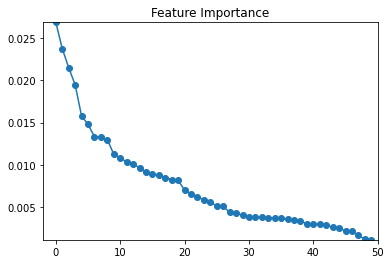

In [39]:
import matplotlib.pyplot as plt

acc.sort()
print(acc)
plt.plot(range(50), acc[:50][::-1], 'o-')
plt.xlim(-2, 50)
plt.ylim(min(acc), max(acc))
plt.title("Feature Importance")
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.87      0.89     51790
           1       0.87      0.93      0.90     51738

    accuracy                           0.90    103528
   macro avg       0.90      0.90      0.90    103528
weighted avg       0.90      0.90      0.90    103528



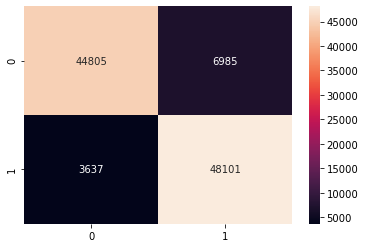

In [40]:
ypred = clf.predict(X_Test)
y_pred_proba = clf.predict_proba(X_Test)[:,1]
y_thresh_pred = np.array((y_pred_proba >= 0.42), dtype = np.int32)

sns.heatmap(confusion_matrix(y_test, y_thresh_pred), annot=True, fmt = "0.0f")
print(classification_report(y_test, y_thresh_pred))


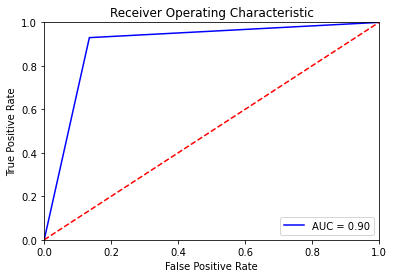

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(y_test, y_thresh_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
test_transaction.fillna(-99999, inplace = True)
test_transaction['ProductCD'] = test_transaction['ProductCD'].astype('category').cat.codes
test_transaction['addr1'] = test_transaction['addr1'].astype('category').cat.codes
test_transaction['addr2'] = test_transaction['addr2'].astype('category').cat.codes
test_transaction['P_emaildomain'] = test_transaction['P_emaildomain'].astype('category').cat.codes
test_transaction['R_emaildomain'] = test_transaction['R_emaildomain'].astype('category').cat.codes
for i in range(1, 7):
    test_transaction['card'+str(i)] = test_transaction['card'+str(i)].astype('category').cat.codes
for i in range(1, 10):
    test_transaction['M'+str(i)] = test_transaction['M'+str(i)].astype('category').cat.codes

TID = test_transaction['TransactionID']


print(len(test_transaction))

506691


In [43]:
test_transaction = scaler.transform(test_transaction)
X_Test = pca.transform(test_transaction)
print(len(X_Test))
print(X_Test)

506691
[[-9.62201838e+00 -1.70134021e+00 -2.38442132e-01 ... -1.12908886e-01
   5.58135357e-01  1.10112594e-02]
 [-9.28864501e+00 -1.36387704e+00 -2.78584928e-01 ... -3.93417663e-03
  -3.81581590e-02  1.02145948e-02]
 [-9.55603373e+00 -1.74191894e+00 -3.48749749e-01 ... -1.06837123e+00
   1.34028605e-01  1.07254816e-02]
 ...
 [-9.45850767e+00 -1.66568346e+00 -1.82939254e-01 ...  7.65365182e-03
   2.59962990e-01 -1.61824045e-02]
 [-9.34647692e+00 -1.51080629e+00 -1.83191294e-01 ... -3.99461716e-02
   6.03633436e-01 -4.64400624e-02]
 [ 8.87335360e+00  1.57551322e+01  2.52955097e-01 ...  2.19471666e-02
   4.10126098e-02 -2.92342490e-02]]


In [44]:
test_proba = clf.predict_proba(X_Test)[:,1]
print(len(test_proba))

506691


In [45]:
#Treshold optimum at 0.42
#So must increase the probability by 0.5-0.42
test_proba = test_proba + 0.08

df = pd.DataFrame({'TransactionID' : TID,
                   'isFraud' : test_proba})
df.to_csv("sample_submis.csv", index = False)
print(df.describe())

       TransactionID        isFraud
count   5.066910e+05  506691.000000
mean    3.916894e+06       0.257844
std     1.462692e+05       0.246950
min     3.663549e+06       0.080000
25%     3.790222e+06       0.093043
50%     3.916894e+06       0.138487
75%     4.043566e+06       0.316760
max     4.170239e+06       1.079770


In [ ]:
print(df.head())